In [1]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow-2.20.0-cp312-cp312-win_amd64.whl.metadata (4.6 kB)
Using cached tensorflow-2.20.0-cp312-cp312-win_amd64.whl (331.9 MB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\surya\\AppData\\Roaming\\Python\\Python312\\site-packages\\tensorflow\\_api\\v2\\compat\\v1\\saved_model\\experimental\\__init__.py'
Check the permissions.



11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


C:\Users\surya\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 51s 51ms/step - accuracy: 0.9523 - loss: 0.1587 - val_accuracy: 0.9866 - val_loss: 0.0439
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 47s 50ms/step - accuracy: 0.9856 - loss: 0.0460 - val_accuracy: 0.9882 - val_loss: 0.0350
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 49s 52ms/step - accuracy: 0.9896 - loss: 0.0324 - val_accuracy: 0.9892 - val_loss: 0.0318
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 47s 50ms/step - accuracy: 0.9924 - loss: 0.0247 - val_accuracy: 0.9884 - val_loss: 0.0337
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 48s 51ms/step - accuracy: 0.9939 - loss: 0.0181 - val_accuracy: 0.9918 - val_loss: 0.0279
313/313 - 4s - 14ms/step - accuracy: 0.9918 - loss: 0.0279

✅ Test Accuracy: 0.9918
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


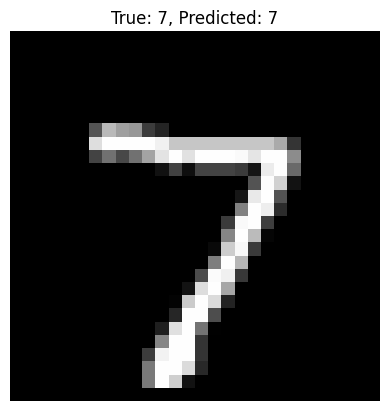

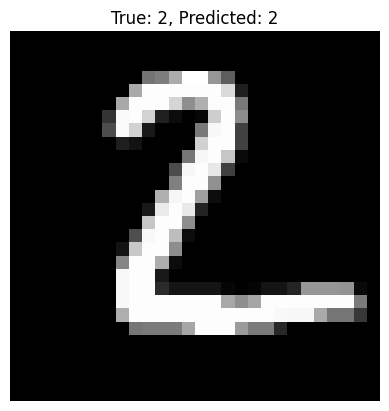

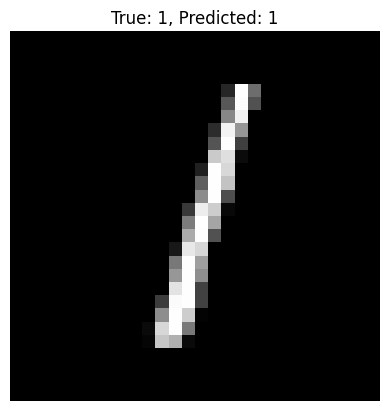

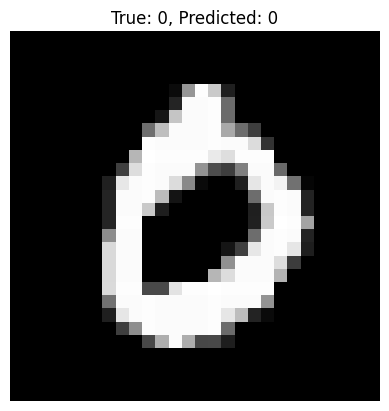

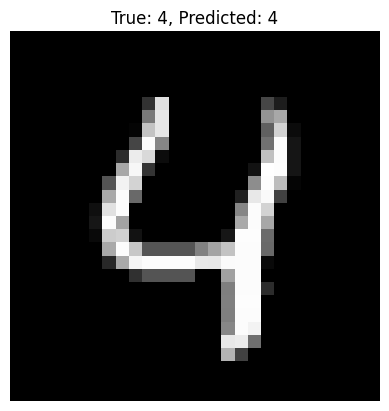

In [2]:
# Task 4: Image Classification - CNN on MNIST

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

# -------------------------------
# 1. Load and Preprocess Data
# -------------------------------
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

# Normalize pixel values (0-255 -> 0-1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape to (samples, height, width, channels)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# -------------------------------
# 2. Build CNN Model
# -------------------------------
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")  # 10 classes (digits 0–9)
])

# -------------------------------
# 3. Compile Model
# -------------------------------
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# -------------------------------
# 4. Train Model
# -------------------------------
history = model.fit(X_train, y_train, epochs=5, batch_size=64,
                    validation_data=(X_test, y_test))

# -------------------------------
# 5. Evaluate Model
# -------------------------------
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")

# -------------------------------
# 6. Predict on Sample Images
# -------------------------------
predictions = model.predict(X_test[:5])

for i in range(5):
    plt.imshow(X_test[i].reshape(28,28), cmap="gray")
    plt.title(f"True: {y_test[i]}, Predicted: {np.argmax(predictions[i])}")
    plt.axis("off")
    plt.show()